<a href="https://colab.research.google.com/github/kay-squared/PyTorchLearn/blob/main/01_PyTorch_Workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn # contains all pytorch building blocks for neural networks. Look up torch.nn

torch.__version__    # need at least 1.10

'1.13.0+cu116'

# Exploring an example of an end-to-end workflow

Resources:
* Code: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/
* Book:01_pytorch_workflow.ipynb
https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a questioin: https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [83]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "Fit/Training",
                      4: "Predict and evaluate (inference)",
                      5: "Save and load",
                      6: "Put it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'Fit/Training',
 4: 'Predict and evaluate (inference)',
 5: 'Save and load',
 6: 'Put it all together'}

## 1. Data (prepare and load)
Data can be almost anything:
* excel
* images
* audio
* videa
* omics
* text

ML is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in thatn numerical representation

### Create data

In [84]:
# create some ground truth data using linear regression (just a line in this case)
# parameters:
weight=0.7
bias=0.3

# create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)      # need unsqueeze for models lateron
y = bias+weight*X

print(X[:10],y[:10])
print(X.shape,y.shape)
print(len(X),len(y))


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
torch.Size([50, 1]) torch.Size([50, 1])
50 50


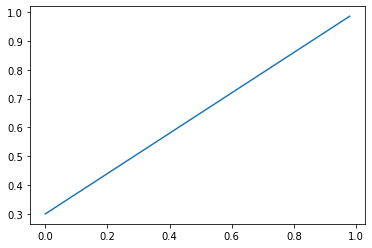

In [85]:
plt.plot(X,y)
plt.show()

### Splitting Data into train and test sets

In [86]:
train_split=int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

# or use scikitlearn 

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [87]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data and test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4, label="Training data")
  plt.scatter(test_data,test_labels,c="orange",s=4, label="Test data")

  if predictions is not None:       # for the test data!
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  
  plt.legend(prop={"size":14})




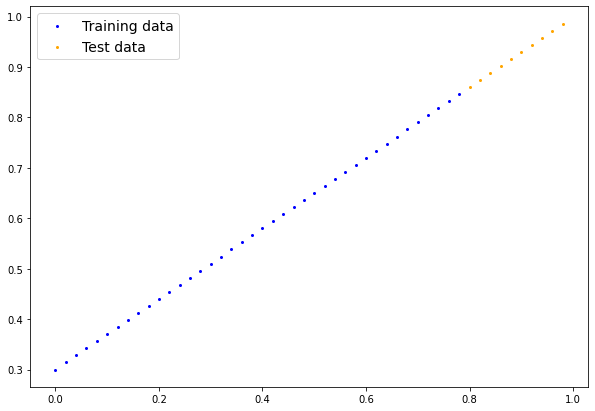

In [88]:
plot_predictions(X_train,y_train,X_test,y_test)

## 2. Build Model

Here: a linear regression model: 

$Y_i = f(X_i,\beta) + e_i$

For object oriented python: https://realpython.com/python3-object-oriented-programming/

* Note: almost everything in torch inherits from nn.Module.

* ad nn.Parameter: when assigned a Model attributes, they are automoatically added to the lit of its parameters

* requires_grad: because we will use gradient descent, so that the model keeps track of the gradients during training, and for use with torch.autograd

Check out torch.nn for more information

The whole purpose of the model is to
1. create random parameters
2. evaluate the model with these parameters on the training data: this forward method overrides forward() from nn.Module.model (I beliieve)
3. then update the parameters with a GD algorithm. This requires a training loop

There are 2 main algorithms that are implemented behnid the scene and which we have to trigger.
1. GD
2. Back propagation

Additional resources:  https://www.3blue1brown.com


In [103]:
class LinearRegressionModel(nn.Module):   # the class inherit fron nn.Module
  def __init__(self):
    super().__init__()
    # initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation in the model (function evaluation)
  
  def forward(self,x:torch.Tensor) -> torch.Tensor:     # x being the training data
    return self.weights * x + self.bias

    
  
    

### PyTorch model building essentials

* torch.nn - contains all building blockes for computatioinal graphs
* torch.nn.Parameter - what parameters should the model learn (often a pytorch layer from torch.nn will et these for us)
* torch.nn.Module - base class for all NN models. If you subclass it, you should override forward
* torch.optim - is where the optimizers in pytorch live, help with GD
* def forward() - all nn.Module subclasses require you to ovverride forward()

For more complex datasets
* torch.utils.data.Datset - represents a map between y and X of data
* torch.utils.data.Dataloader - creates a Python iterable over a torch Dataet that allows you to iterate over data
* torchvision.transforms

Furthermore for model building
* torchvision.models       # for pretrained CV models
* torch.optim

For evaluation and experimentation
* torch.metrics
* torch.utils.tensorboard





Check out pytorch cheat sheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our pytorch model

Check parameters with .parameters

In [104]:
# Create a random seed for reproducability
# BEFORE I instantiate the model
RANDOM_SEED =42
torch.manual_seed(RANDOM_SEED)

# create an instance of the model
model_0 = LinearRegressionModel()
# If I ask for the parameters, the output is <generator ...
# model_0.parameters()
# Ask for a list instead
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [91]:
# List named parameter (more comprehensible) and compare to true weight and bias
print(model_0.state_dict())
print(weight,bias)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
0.7 0.3


### Try making predictions on test data

With the initial parameters using torch.inference_mode(). Make predictions using torch.inference_mode() - this is a context manager that turns off gradient tracking because during inference we do not have to keep track which makes sytax a bit easier, and it is also faster


Either use

   

```
with torch.inference_mode()      #rather new, preferred
```
OR


```
with torch.no_grad()       # older syntax
```





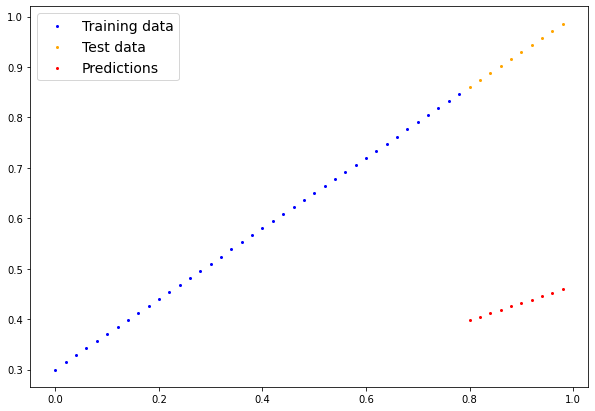

In [105]:

with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

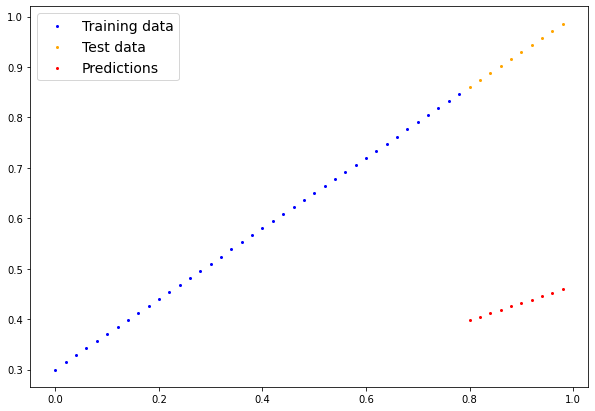

In [93]:
#actually this is the same as using 
y_preds = model_0(X_test)
y_preds.squeeze()
plot_predictions(predictions=y_preds.detach().numpy())
# but this is more complicated because you have to detach the tensor

### 3. Training a model

* metric for goodness of a representation: **loss functions**: go look on torch.nn ( = criterion, cost function)
* **optimizer**: takes into account the loss of a model and adjusts the models parameters to improve the loss function
* specifically iin PyTorch we need a **training loop** and a **testing loop**



### Implementing Loss functions and optimizers 
* loss functions in torch.nn (L1Loss, MSELoss,...)
* optimizers in torch.optim (SGD, RMpropm, Adagrad, Adam,...) that accept parameters, **lr**

For regression problems: L1 or L2


In [106]:
# setting up a loss function
loss_fn = nn.L1Loss()

In [107]:
# setting up an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### Building a training loop and a testing loop

Need:
0. Loop through the data
1. **Forward pass** (forward propagation)
2. Calculate loss (compare forward pass predictions with ground truth)
3. optimizer zero grad
4. **back propagatiion** - move backwards through the network to calculate the gradients of each of the parameters of the model with respect to the loss
5. Optimizer step  - use optimizer to adjust model parameters to improve the loss


In [108]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [148]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
# for some reason I have not yet understood,
# the loss function an dthe optimiizer have to
# be redefined after creating the model instance

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

epochs =200   # a single forward pass

for epoch in np.arange(epochs):
  # set the model to training mode (is default)
  model_0.train()      # sets all parameters that require gradients to requries_gradients

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate loss
  loss = loss_fn(y_pred,y_train)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform back propagation
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step()  # by default, how the optimizer changes will acumulate throught the looop, so they have to be zeroed in step 3
  #print(f"parameters: {model_0.state_dict()}")


  # 6. testing
  model_0.eval()        # put model in evaluation mode
  with torch.inference_mode():        # turns off gradient tracking and other things    
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds,y_test)
    if epoch%50==0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
      #print(f"Parameters: {list(model_0.parameters())}") 
      #plot_predictions(predictions = test_preds)



Epoch: 0 | Train loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 50 | Train loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 100 | Train loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 150 | Train loss: 0.0072835334576666355 | Test loss: 0.016474086791276932


In [157]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)
epochs =200   # a single forward pass

# keeping track
epoch_count=[]
loss_train_list=[]
loss_test_list=[]

for epoch in np.arange(epochs):
  # train
  model_0.train()     

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()  
  
  # 6. testing
  model_0.eval()        
  with torch.inference_mode():         
    
    if epoch%10==0:
      test_preds = model_0(X_test)
      test_loss = loss_fn(test_preds,y_test)
      
      epoch_count.append(epoch)
      loss_train_list.append(loss.detach().numpy())
      loss_test_list.append(test_loss.detach().numpy())

      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
      #print(f"Parameters: {list(model_0.parameters())}") 
      #plot_predictions(predictions = test_preds)



Epoch: 0 | Train loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Train loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Train loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Train loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Train loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Train loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Train loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Train loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Train loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Train loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Train loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Train loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Train loss: 0.01758546568453312 | Test loss: 0.040604822337627

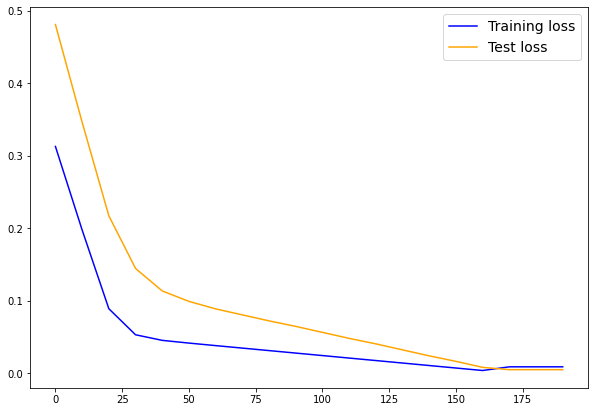

In [165]:
# now plot the learning curve

def plot_learning_curve(epoch_count, loss_train_list, loss_test_list):
  plt.figure(figsize=(10,7))
  plt.plot(epoch_count,loss_train_list,c="b", label="Training loss")
  plt.plot(epoch_count,loss_test_list,c="orange", label="Test loss")
  plt.legend(prop={"size": 14})

plot_learning_curve(epoch_count, loss_train_list, loss_test_list)

### Converting lists generated during training to numpy for plottinig



```
loss_test_list.detach().numpy()
```
or


```
np.array(torch.tensor(loss_test_list).numpy()
```



